In [58]:
# dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ETS

In [59]:
# filepath
path_1 = "Data/BicycleSales_2015-20211021_Cleaned.xlsx"
path_2 = "Data/BikeSpecs.xlsx"

# read data
sales_df = pd.read_excel(path_1)
specs_df = pd.read_excel(path_2)

In [60]:
# rename specs Object column to Material
specs1_df = specs_df.rename(columns={"Object":"Material"})

# merge specs into sales data frame
merged_df = pd.merge(sales_df, specs1_df, on="Material", how="left")

In [61]:
# reduce down to necessary columns
reduced_df = merged_df[["Material", "Sold-to pt", "Month", "Invoiced Quantity", 
                        "Product hierarchy.1", "Application_x", "Tire Size", "Ply Construction",
                        "Bead", "Color", "TPI - Threads per inch", "Compound", "Technology"
                       ]]

# rename columns
reduced_df = reduced_df.rename(columns={"Product hierarchy.1":"Product hierarchy",
                                        "Application_x":"Application"})

In [62]:
# split tire size by diameter (before x) and width (after x)
reduced_df[["Diameter", "Width"]] = reduced_df["Tire Size"].str.split("X", n=1, expand=True)

# splite Month into separate month and year components
reduced_df[["Month", "Year"]] = reduced_df["Month"].str.split("/", n=1, expand=True)

In [63]:
# create Date column with reordered Year/Date format
reduced_df["Date"] = reduced_df["Year"] + "/" + reduced_df["Month"]

In [64]:
# strip erroneous text from diameter and width
reduced_df["Diameter"] = reduced_df["Diameter"].str.replace(r'"','')
reduced_df["Width"] = reduced_df["Width"].str.replace(r'"','')

# drop application Tubes and MVS
reduced_df[reduced_df["Application"].str.contains("TUBE|MVS")==False]

,Material,Sold-to pt,Month,Invoiced Quantity,Product hierarchy,Application,Tire Size,Ply Construction,Bead,Color,TPI - Threads per inch,Compound,Technology,Diameter,Width,Year,Date
0,TB29688100,1025073,01,1,M143 CREEPY CRAWLER,MODIFIED TRIALS,20X2.00,Single Ply,Wire,Black,60,Super Tacky,ST,20,2.00,2015,2015/01
1,TB73301000,1025073,01,6,M147 DTH,URBAN,26X2.30,Single Ply,Foldable,Black,60,Single,,26,2.30,2015,2015/01
2,TB96802000,1025073,01,2,M148 GRIFTER,URBAN,29X2.50,Single Ply,Wire,Black,60,Single,,29,2.50,2015,2015/01
3,TB96651200,1025073,01,2,M149 TORCH,URBAN,29X2.10,Single Ply,Foldable,Black,120,Single,SilkWorm,29,2.10,2015,2015/01
4,TB35790100,1025073,01,0,M151 SNYPER,BMX,20X2.25,Single Ply,Foldable,Black,60,Dual,EXO,20,2.25,2015,2015/01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77561,TB00241300,1035759,10,2,M357RU Dissector,MOUNTAIN,29X2.40,Single Ply,Foldable,Black,60,Dual,EXO/TR,29,2.40,2021,2021/10
77562,TB00200500,1035815,10,1,M2018RU RAMBLER,DIRT ROAD/GRAVEL,700X40,Single Ply,Foldable,Black,60,Dual,SilkShield/TR,700,40,2021,2021/10
77563,TB00241300,1035905,10,2,M357RU Dissector,MOUNTAIN,29X2.40,Single Ply,Foldable,Black,60,Dual,EXO/TR,29,2.40,2021,2021/10
77564,TB91145000,1035908,10,2,M349 Rekon,MOUNTAIN,27.5X2.60,Single Ply,Foldable,Black,120,3C Maxx Terra,3CT/EXO/TR,27.5,2.60,2021,2021/10


In [65]:
#Displaying Cleaned Dataframe
reduced_df

# Output to excel for review
# reduced_df.to_excel('Output/output.xlsx')

,Material,Sold-to pt,Month,Invoiced Quantity,Product hierarchy,Application,Tire Size,Ply Construction,Bead,Color,TPI - Threads per inch,Compound,Technology,Diameter,Width,Year,Date
0,TB29688100,1025073,01,1,M143 CREEPY CRAWLER,MODIFIED TRIALS,20X2.00,Single Ply,Wire,Black,60,Super Tacky,ST,20,2.00,2015,2015/01
1,TB73301000,1025073,01,6,M147 DTH,URBAN,26X2.30,Single Ply,Foldable,Black,60,Single,,26,2.30,2015,2015/01
2,TB96802000,1025073,01,2,M148 GRIFTER,URBAN,29X2.50,Single Ply,Wire,Black,60,Single,,29,2.50,2015,2015/01
3,TB96651200,1025073,01,2,M149 TORCH,URBAN,29X2.10,Single Ply,Foldable,Black,120,Single,SilkWorm,29,2.10,2015,2015/01
4,TB35790100,1025073,01,0,M151 SNYPER,BMX,20X2.25,Single Ply,Foldable,Black,60,Dual,EXO,20,2.25,2015,2015/01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77561,TB00241300,1035759,10,2,M357RU Dissector,MOUNTAIN,29X2.40,Single Ply,Foldable,Black,60,Dual,EXO/TR,29,2.40,2021,2021/10
77562,TB00200500,1035815,10,1,M2018RU RAMBLER,DIRT ROAD/GRAVEL,700X40,Single Ply,Foldable,Black,60,Dual,SilkShield/TR,700,40,2021,2021/10
77563,TB00241300,1035905,10,2,M357RU Dissector,MOUNTAIN,29X2.40,Single Ply,Foldable,Black,60,Dual,EXO/TR,29,2.40,2021,2021/10
77564,TB91145000,1035908,10,2,M349 Rekon,MOUNTAIN,27.5X2.60,Single Ply,Foldable,Black,120,3C Maxx Terra,3CT/EXO/TR,27.5,2.60,2021,2021/10


In [66]:
# split Technology into individual components (delimited by /) and return new columns for
# Protection (EXO, EXO+, MaxxShield, SilkWorm, SilkShield, DD, DH) and Tubeless Ready (TR)
# tech = reduced_df["Technology"].unique()

# tech

# protection = ["EXO", "EXO+", "DD", "DH", 
#               "MaxxShield", "SilkShield", "SilkWorm", 
#               "Aramid Inside", "Nylon Breaker"]

# reduced_df["Protection"] = "None"

# for each in protection:
#     reduced_df["Protection"][reduced_df["Technology"].str.contains(each)] = each
    
# reduced_df

In [67]:
#splitting Technology by /
# reduced_tech = reduced_df["Technology"].str.split('/', expand=True)
# reduced_tech

In [68]:
# group by material create a time series for each material for invoiced quantity by month
# diameter_df = reduced_df.groupby(["Diameter"])[["Diameter", "Month", "Invoiced Quantity"]]
# month_df = reduced_df.groupby(["Month"])[["Month", "Invoiced Quantity"]]
date_df = reduced_df.groupby(["Date"], as_index = False)[["Date", "Invoiced Quantity"]].sum()                     
date_df

,Date,Invoiced Quantity
0,2015/01,7210
1,2015/02,11520
2,2015/03,12564
3,2015/04,12648
4,2015/05,19070
...,...,...
77,2021/06,29528
78,2021/07,25659
79,2021/08,27208
80,2021/09,11897


C:\Users\iamth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\iamth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:>

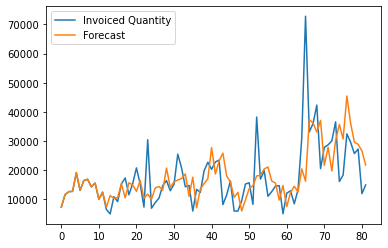

In [69]:
date_df["Forecast"] = ETS(date_df["Invoiced Quantity"],
                           trend="mul",seasonal="mul",
                           seasonal_periods=12).fit().fittedvalues

date_df.plot()

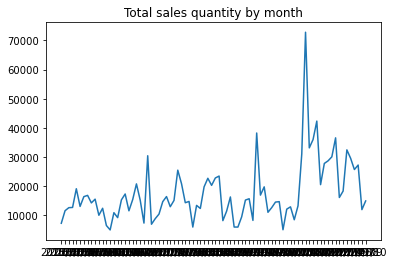

In [70]:
# Prelimiary plot to quickly visualize overall
plt.plot(date_df["Date"], date_df["Invoiced Quantity"])
plt.title("Total sales quantity by month")

plt.show()

In [71]:
# group by year and month then sum invoiced quantity
year_month_df = reduced_df.groupby(["Year", "Month"],
                                   as_index = False)[["Year", "Month", "Invoiced Quantity"]].sum()
year_month_df

,Year,Month,Invoiced Quantity
0,2015,01,7210
1,2015,02,11520
2,2015,03,12564
3,2015,04,12648
4,2015,05,19070
...,...,...,...
77,2021,06,29528
78,2021,07,25659
79,2021,08,27208
80,2021,09,11897


C:\Users\iamth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\iamth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\iamth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-72-20c2424b72a1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc1519_df["FC_mul"] = ETS(fc1519_df["Invoiced Quantity"],


<AxesSubplot:>

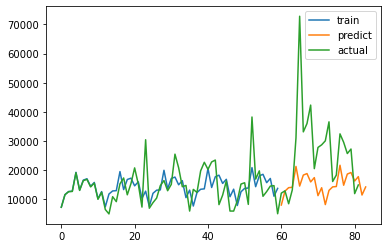

In [72]:
fc_df = year_month_df

fc1519_df = fc_df.loc[(fc_df['Year'] == "2015")|
          (fc_df['Year'] == "2016")|
          (fc_df['Year'] == "2017")|
          (fc_df['Year'] == "2018")|
          (fc_df['Year'] == "2019"), :]

fit_model = ETS(fc1519_df["Invoiced Quantity"],
                           trend="mul",seasonal="mul",
                           seasonal_periods=12).fit()

fc2021 = fit_model.forecast(24)

fc1519_df["FC_mul"] = ETS(fc1519_df["Invoiced Quantity"],
                           trend="mul",seasonal="mul",
                           seasonal_periods=12).fit().fittedvalues

# fc1519_df["FC_add"] = ETS(fc1519_df["Invoiced Quantity"],
#                            trend="add",seasonal="add",
#                            seasonal_periods=12).fit().fittedvalues

# fc_df = pd.merge(fc_df, fc1519_df, left_index=True, right_index=True, how="left" )

# fc1519_df
fc1519_df["FC_mul"].plot(legend=True, label="train")
fc2021.plot(legend=True, label="predict")
fc_df["Invoiced Quantity"].plot(legend=True, label="actual")

In [73]:
fc1519_yr_df = fc1519_df.groupby(["Year"],
                                   as_index = False)[["Year","Invoiced Quantity", "FC_add","FC_mul"]].sum()

fc1519_yr_df

KeyError: "Columns not found: 'FC_add'"

In [74]:
years = fc1519_df["Year"].unique()
months = {"Month": fc1519_df["Month"].unique()}
act_df = pd.DataFrame(months)

for each in years:
    df = fc1519_df.loc[fc1519_df['Year'] == each]
    df = df[["Month","Invoiced Quantity"]]
    df = df.rename(columns={"Invoiced Quantity" : each})
    act_df = pd.merge(act_df, df, on="Month", how="left" )      

act_df

,Month,2015,2016,2017,2018,2019
0,01,7210,6443,6883,13355,9405
1,02,11520,4928,8792,12299,15180
2,03,12564,10845,10363,19711,15632
3,04,12648,9149,14637,22658,8198
4,05,19070,15252,16388,20236,38211
5,06,12998,17268,12897,22771,16883
6,07,16351,11494,15073,23427,19719
7,08,16791,15339,25451,8115,10980
8,09,14204,20735,20776,11380,12589
9,10,15497,15161,14271,16247,14486


In [ ]:
qtr_df = year_month_df

qtr_df = qtr_df.astype({"Month": int})

bins = [0,3,6,9,12]
qtr = [1,2,3,4]

qtr_df["Quarter"] = pd.cut(qtr_df["Month"], bins, labels=qtr,include_lowest=True)

qtr_gb_df = qtr_df.groupby(["Year", "Quarter"],
               as_index = False)[["Year", "Quarter", "Invoiced Quantity"]].sum()

qtr1519_df = qtr_gb_df.loc[(qtr_gb_df['Year'] == "2015")|
          (qtr_gb_df['Year'] == "2016")|
          (qtr_gb_df['Year'] == "2017")|
          (qtr_gb_df['Year'] == "2018")|
          (qtr_gb_df['Year'] == "2019"), :]

qtr1519_df["FC_mul"] = ETS(qtr1519_df["Invoiced Quantity"],
                           trend="mul",seasonal="mul",
                           seasonal_periods=4).fit().fittedvalues

qtr1519_df["FC_add"] = ETS(qtr1519_df["Invoiced Quantity"],
                           trend="add",seasonal="add",
                           seasonal_periods=4).fit().fittedvalues

qtr1519_df
# qtr1519_df[["Invoiced Quantity","FC_mul","FC_add"]].plot()

In [ ]:
# Find years and months, 
# create a dataframe containing the summed quantities for each date 
# with months in rows and years in columns

years = year_month_df["Year"].unique()
months = {"Month": year_month_df["Month"].unique()}
yearly_df = pd.DataFrame(months)

for each in years:
    df = year_month_df.loc[year_month_df['Year'] == each]
    df = df[["Month","Invoiced Quantity"]]
    df = df.rename(columns={"Invoiced Quantity" : each})
    yearly_df = pd.merge(yearly_df, df, on="Month", how="left" )     q 

yearly_df

In [ ]:
# plot quantity by month for each year
for each in years:
    plt.plot(yearly_df["Month"], yearly_df[each], label = each)

plt.xlabel("Month")
plt.ylabel("Quantity",color = "darkcyan")
plt.legend(title="Year")
plt.grid()
plt.show()

In [ ]:
application_df = reduced_df.groupby(["Application","Year"],
                                   as_index = False)[["Application","Year","Invoiced Quantity"]].sum()

years = application_df["Year"].unique()
applications = {"Application": application_df["Application"].unique()}
application_year_df = pd.DataFrame(applications)

for each in years:
    df = application_df.loc[application_df['Year'] == each]
    df = df[["Application","Invoiced Quantity"]]
    df = df.rename(columns={"Invoiced Quantity" : each})
    application_year_df = pd.merge(application_year_df, df, on="Application", how="left" )      

application_year_df

In [ ]:
diameter_df = reduced_df.groupby(["Application","Diameter","Year"],
                                   as_index = False)[["Application","Diameter","Year",
                                                      "Invoiced Quantity"]].sum()

diameter_mountain_df = diameter_df.loc[diameter_df['Application'] == "MOUNTAIN"]

diameter_mountain_df = diameter_mountain_df[["Diameter","Year","Invoiced Quantity"]]

years = diameter_mountain_df["Year"].unique()
diameters = {"Diameter": diameter_mountain_df["Diameter"].unique()}
diameter_year_df = pd.DataFrame(diameters)

for each in years:
    df = diameter_mountain_df.loc[diameter_mountain_df['Year'] == each]
    df = df[["Diameter","Invoiced Quantity"]]
    df = df.rename(columns={"Invoiced Quantity" : each})
    diameter_year_df = pd.merge(diameter_year_df, df, on="Diameter", how="left" )      

diameter_year_df

In [ ]:
# forecasting

In [ ]:
#louis test1

In [ ]:
#"Please work correctly you piece of shit"
# I can't believe Louis made changes without respecting my authority